In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Get unique values and their counts for column 'C'
value_counts = df['Class'].value_counts()

# Print unique values with their counts
print(value_counts)

Class
0    284315
1       492
Name: count, dtype: int64


In [9]:
# Check for null values
null_values = df.isnull().sum()

# Print the null values
print(null_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
pip install seaborn

In [ ]:
pip install matplotlib

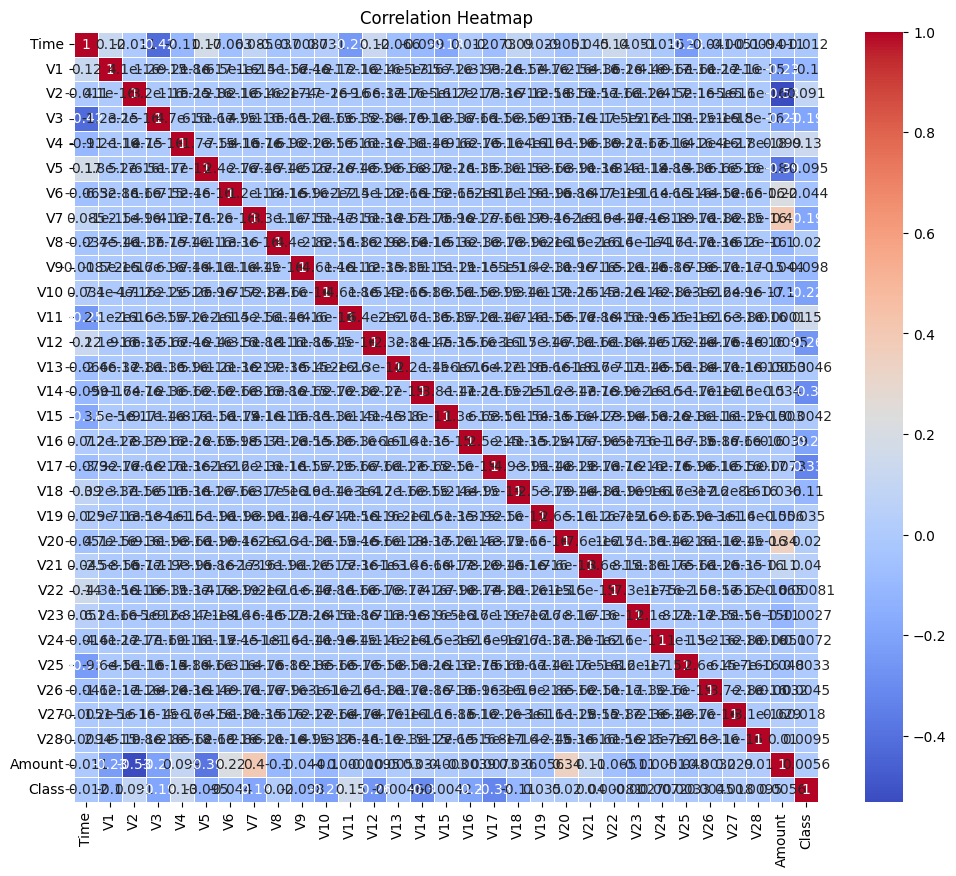

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations between numeric columns
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [13]:
# Set a threshold for correlation
threshold = 0.8

# Find highly correlated pairs
highly_correlated_pairs = {}
cols = correlation_matrix.columns
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (cols[i], cols[j])
            highly_correlated_pairs[pair] = correlation_matrix.iloc[i, j]

# Print highly correlated pairs
print("Highly correlated pairs (correlation > %.2f):" % threshold)
for pair, corr in highly_correlated_pairs.items():
    print(f"{pair}: {corr}")

Highly correlated pairs (correlation > 0.80):


In [ ]:
pip install scikit-learn

In [15]:
from sklearn.preprocessing import StandardScaler


# Select only numerical columns for standardization
numerical_cols = ["Time","Amount"]

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print the standardized dataframe
print(df.head())

       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.12

Class
0    284315
1       492
Name: count, dtype: int64


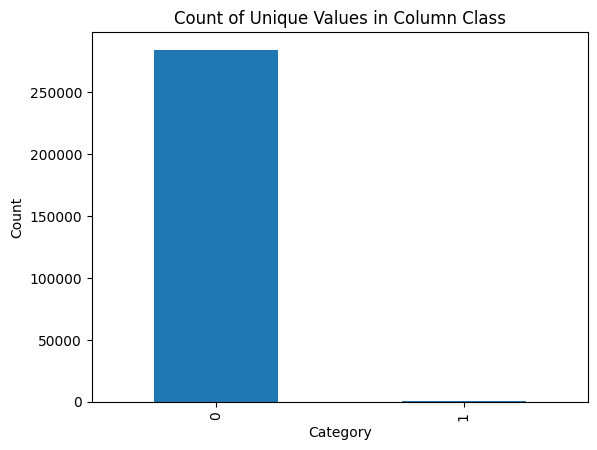

In [16]:
# Get unique values and their counts for column 'C'
value_counts = df['Class'].value_counts()

# Print unique values with their counts
print(value_counts)

# Plot the graph
value_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Unique Values in Column Class')
plt.show()

In [17]:
df.to_csv("cleaned_dataset.csv", index=False)
print("Data saved to cleaned_dataset.csv")

Data saved to cleaned_dataset.csv


Resampling my dataset

In [ ]:
pip install imblearn

In [ ]:
pip install --upgrade pip

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline

def balance_dataset(data, target_column='Class', random_state=42):
    """
    Balances the entire dataset using SMOTE and ENN.

    Args:
        data: A pandas DataFrame containing the dataset.
        target_column: The name of the target variable column.
        random_state: Controls the randomness of the resampling.

    Returns:
        A balanced version of the entire dataset.
    """
    # Separate features and target
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Create a pipeline with SMOTE and ENN
    over = SMOTE(sampling_strategy='auto', random_state=random_state)
    under = EditedNearestNeighbours()
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)

    # Apply the pipeline
    X_resampled, y_resampled = pipeline.fit_resample(X, y)

    # Convert back to DataFrame
    X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
    y_resampled_df = pd.Series(y_resampled, name=target_column)

    # Combine features and target
    resampled_data = pd.concat([X_resampled_df, y_resampled_df], axis=1)

    return resampled_data

# Example usage
try:
    # Load your data
    data = pd.read_csv('cleaned_dataset.csv')
    
    # Print original class distribution
    print("Original class distribution:")
    print(data['Class'].value_counts(normalize=True))

    # Balance the entire dataset
    balanced_data = balance_dataset(data)

    # Print new class distribution
    print("\nBalanced class distribution:")
    print(balanced_data['Class'].value_counts(normalize=True))

    # Save the balanced data
    balanced_data.to_csv('cleaned_dataset_balanced.csv', index=False)

    print("\nBalanced dataset saved to 'cleaned_dataset_balanced.csv'")
    print(f"Original dataset shape: {data.shape}")
    print(f"Balanced dataset shape: {balanced_data.shape}")

except FileNotFoundError:
    print("Error: Could not find the data file.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

Original class distribution:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

Balanced class distribution:
Class
0    0.5
1    0.5
Name: proportion, dtype: float64

Balanced dataset saved to 'cleaned_dataset_balanced.csv'
Original dataset shape: (284807, 31)
Balanced dataset shape: (568630, 31)


In [ ]:
pip install tensorflow

In [ ]:
pip install --upgrade tensorflow

In [ ]:
pip install setuptools

In [ ]:
pip install scikeras

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, Concatenate, Input, Attention
from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from keras.callbacks import LearningRateScheduler

# Define a learning rate schedule function
def lr_schedule(epoch):
    """
    Learning rate schedule function.
    Adjust the learning rate based on the epoch.
    """
    lr = 0.001  # Initial learning rate
    if epoch > 10:
        lr *= 0.5  # Reduce learning rate by half after 10 epochs
    return lr

# Create LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Read the uploaded file into a pandas dataframe
df = pd.read_csv("cleaned_dataset_balanced.csv")

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.33, random_state=17)

# Preprocess structured data using Logistic Regression
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

preprocessor_lr = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define Logistic Regression model
lr_model = Pipeline(steps=[('preprocessor', preprocessor_lr), ('clf', LogisticRegression())])

# Train Logistic Regression model
lr_model.fit(X_train, y_train)

# Predict using Logistic Regression model
y_pred_lr = lr_model.predict(X_test[:y_test.shape[0]])

# Preprocess sequential data using LSTM
preprocessor_lstm = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the LSTM model input shape
input_shape = (X_train.shape[1], 1)  # (number_of_features, 1)

# Define the LSTM model using the correct input shape
lstm_model = Sequential([
    LSTM(units=64, input_shape=input_shape),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Now, fit the model with the callbacks and other parameters
lstm_model.fit(X_train, y_train, epochs=30, batch_size=64, callbacks=[lr_scheduler], verbose=0)

# Predict using LSTM model
y_pred_lstm = (lstm_model.predict(X_test[:y_test.shape[0]]) > 0.5).astype("int32").reshape(-1)

# Print shapes for debugging
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred_lr:", y_pred_lr.shape)
print("Shape of y_pred_lstm:", y_pred_lstm.shape)

# Concatenate predictions from LR and LSTM models
concatenated_predictions = np.column_stack((y_pred_lr, y_pred_lstm))

# Attention mechanism
attention_layer = Dense(1, activation='tanh')(concatenated_predictions)
attention_weight = Dense(1, activation='softmax')(attention_layer)
weighted_predictions = np.column_stack((y_pred_lr * attention_weight[:, 0], y_pred_lstm * (1 - attention_weight[:, 0])))
ensemble_pred = np.sum(weighted_predictions, axis=1)

# Convert predictions to binary
ensemble_pred_binary = (ensemble_pred > 0.5).astype("int32")

# Print shapes for debugging
print("Shape of ensemble_pred:", ensemble_pred.shape)
print("Shape of ensemble_pred_binary:", ensemble_pred_binary.shape)

# Calculate accuracy and additional evaluation metrics of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_pred_binary)
roc_auc = roc_auc_score(y_test, ensemble_pred)
precision, recall, f1_score, _ = classification_report(y_test, ensemble_pred_binary, output_dict=True)['1'].values()

print("Confusion matrix:\n", confusion_matrix(y_test, ensemble_pred_binary))
print("Classification report:\n", classification_report(y_test, ensemble_pred_binary))
print("AUC:", roc_auc)

c:\Users\DURGA PRASAD\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5864/5864 ━━━━━━━━━━━━━━━━━━━━ 51s 9ms/step
Shape of y_test: (187648,)
Shape of y_pred_lr: (187648,)
Shape of y_pred_lstm: (187648,)
Shape of ensemble_pred: (187648,)
Shape of ensemble_pred_binary: (187648,)


c:\Users\DURGA PRASAD\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (187648, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Confusion matrix:
 [[91724  2450]
 [ 7302 86172]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     94174
           1       0.97      0.92      0.95     93474

    accuracy                           0.95    187648
   macro avg       0.95      0.95      0.95    187648
weighted avg       0.95      0.95      0.95    187648

AUC: 0.9479331737765635
